In [385]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from scipy.stats import pearsonr
import warnings
warnings.filterwarnings("ignore")


In [386]:
data=pd.read_csv("Top 50 Fast-Food Chains in USA.csv")

In [387]:
data.head()

,Fast-Food Chains,U.S. Systemwide Sales (Millions - U.S Dollars),Average Sales per Unit (Thousands - U.S Dollars),Franchised Stores,Company Stores,2021 Total Units,Total Change in Units from 2020
0,Arby’s,4462,1309,2293,1116,3409,40
1,Baskin-Robbins,686,296,2317,0,2317,102
2,Bojangles,1485,1924,496,277,773,15
3,Burger King,10033,1470,7054,51,7105,24
4,Carl’s Jr.,1560,1400,1011,47,1058,-21


In [388]:
data.describe()

,U.S. Systemwide Sales (Millions - U.S Dollars),Average Sales per Unit (Thousands - U.S Dollars),Franchised Stores,Company Stores,2021 Total Units,Total Change in Units from 2020
count,50.000000,50.000000,50.00000,50.00000,50.000000,50.000000
mean,4965.060000,1857.660000,2663.96000,503.50000,3167.400000,29.700000
std,7531.439444,1163.266418,3801.49754,1332.16928,4124.173105,173.769875
min,615.000000,296.000000,0.00000,0.00000,243.000000,-1043.000000
25%,935.250000,1084.000000,478.00000,33.75000,788.250000,-4.250000
50%,2289.500000,1510.500000,1115.50000,176.00000,1634.000000,24.000000
75%,5400.000000,2129.750000,3103.00000,396.00000,3516.250000,91.000000
max,45960.000000,6100.000000,21147.00000,8953.00000,21147.000000,246.000000


In [389]:
data.shape

(50, 7)

In [390]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                                            Non-Null Count  Dtype 
---  ------                                            --------------  ----- 
 0   Fast-Food Chains                                  50 non-null     object
 1   U.S. Systemwide Sales (Millions - U.S Dollars)    50 non-null     int64 
 2   Average Sales per Unit (Thousands - U.S Dollars)  50 non-null     int64 
 3   Franchised Stores                                 50 non-null     int64 
 4   Company Stores                                    50 non-null     int64 
 5   2021 Total Units                                  50 non-null     int64 
 6   Total Change in Units from 2020                   50 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.9+ KB


In [391]:
data.isnull().value_counts()

Fast-Food Chains  U.S. Systemwide Sales (Millions - U.S Dollars)  Average Sales per Unit (Thousands - U.S Dollars)  Franchised Stores  Company Stores  2021 Total Units  Total Change in Units from 2020
False             False                                           False                                             False              False           False             False                              50
Name: count, dtype: int64

In [392]:
data['Log Sales'] = np.log(data['U.S. Systemwide Sales (Millions - U.S Dollars)'])
data['Log Average Sales per Unit'] = np.log(data['Average Sales per Unit (Thousands - U.S Dollars)'])
data['Sales Efficiency Ratio'] = data['U.S. Systemwide Sales (Millions - U.S Dollars)'] / data['2021 Total Units']


In [393]:
print("Skewness before transformation:")
print(data[['U.S. Systemwide Sales (Millions - U.S Dollars)', 'Average Sales per Unit (Thousands - U.S Dollars)']].skew())
print("\nSkewness after transformation:")
print(data[['Log Sales', 'Log Average Sales per Unit']].skew())

Skewness before transformation:
U.S. Systemwide Sales (Millions - U.S Dollars)      3.849276
Average Sales per Unit (Thousands - U.S Dollars)    1.607486
dtype: float64

Skewness after transformation:
Log Sales                     0.532158
Log Average Sales per Unit   -0.089887
dtype: float64


## DATA ANALYSIS

In [394]:
data1=data.sort_values(by="U.S. Systemwide Sales (Millions - U.S Dollars)",ascending=False)
data2=data.sort_values(by="Average Sales per Unit (Thousands - U.S Dollars)",ascending=False)
# top_10_chains = data.nlargest(10, "U.S. Systemwide Sales (Millions - U.S Dollars)")

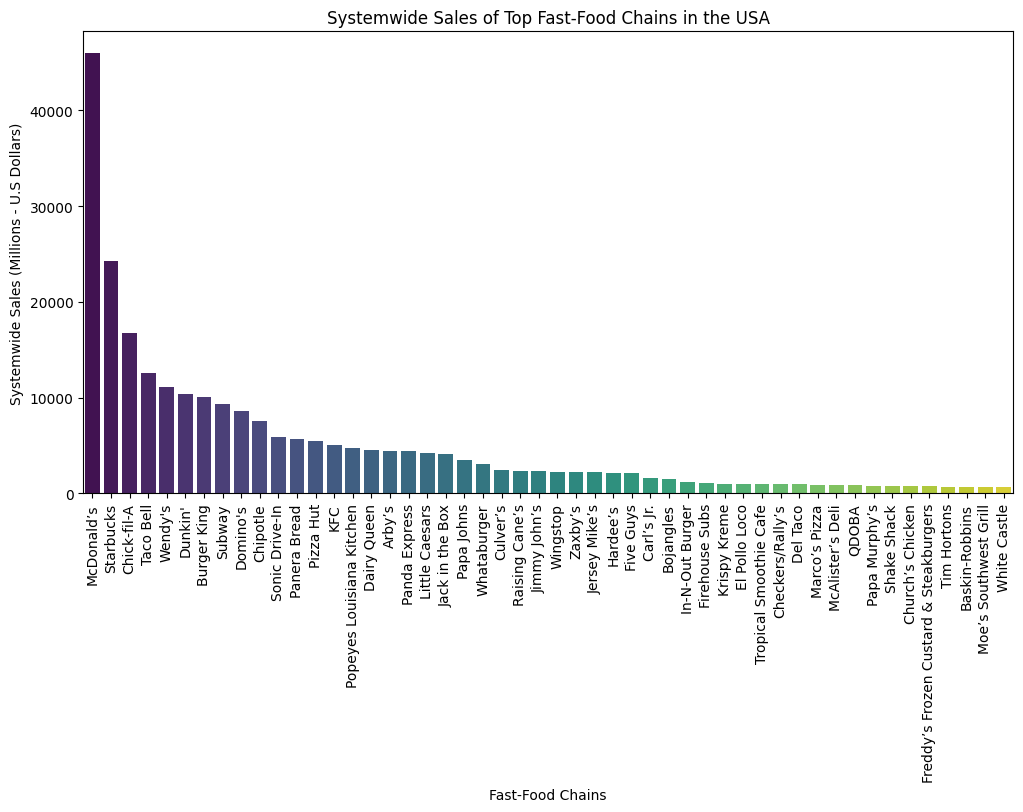

In [395]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(y=data1["U.S. Systemwide Sales (Millions - U.S Dollars)"], 
            x=data1["Fast-Food Chains"], 
            palette='viridis')  # You can choose any color palette you like


plt.xticks(rotation=90)
plt.xlabel("Fast-Food Chains")
plt.ylabel("Systemwide Sales (Millions - U.S Dollars)")
plt.title("Systemwide Sales of Top Fast-Food Chains in the USA")
plt.show()

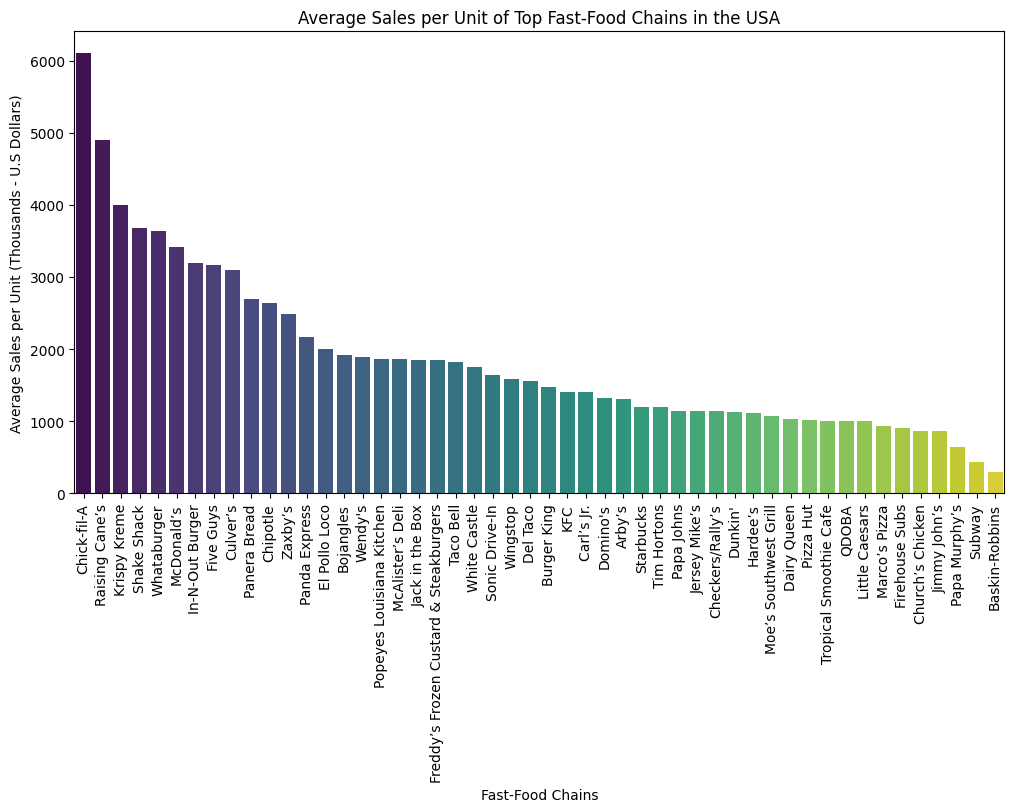

In [396]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(y=data2["Average Sales per Unit (Thousands - U.S Dollars)"], 
            x=data2["Fast-Food Chains"], 
            palette='viridis')  # You can choose any color palette you like


plt.xticks(rotation=90)
plt.xlabel("Fast-Food Chains")
plt.ylabel("Average Sales per Unit (Thousands - U.S Dollars)")
plt.title("Average Sales per Unit of Top Fast-Food Chains in the USA")
plt.show()

In analyzing the sales performance of various fast-food chains, we find that some brands, such as Baskin Robbins, Moe's Southwest Grill, and White Castle, exhibit lower overall sales figures. However, a closer examination of average sales per unit reveals that White Castle and Moe's Southwest Grill maintain a relatively strong average sales performance. This suggests that while their total sales may be modest, each outlet operates efficiently and generates a reasonable amount of revenue relative to its size.

Conversely, chains like McDonald's and Starbucks demonstrate high systemwide sales figures, which can largely be attributed to their extensive networks of outlets. Their success hinges on volume rather than efficiency, as the sheer number of locations contributes significantly to their overall sales.

In contrast, Chick-fil-A stands out as a brand achieving high sales per outlet, indicating strong operational efficiency despite a smaller number of locations. Similarly, Raising Cane's shows impressive sales figures, further underscoring the effectiveness of their business model.

This analysis highlights the diverse pathways to success within the competitive fast-food landscape. It emphasizes the importance of considering both total sales and operational efficiency when evaluating business performance. The interplay between a chain's sales volume and its ability to generate revenue per unit illustrates that success in the fast-food industry can arise from different strategies, whether through extensive market presence or through individual store performance.

In [397]:
total_franchise_sales = (data["Franchised Stores"] * data["Average Sales per Unit (Thousands - U.S Dollars)"]).sum()
total_company_sales = (data["Company Stores"] * data["Average Sales per Unit (Thousands - U.S Dollars)"]).sum()
print(f"Total Franchise Sales: {total_franchise_sales:.2f} Million USD")
print(f"Total Company Sales: {total_company_sales:.2f} Million USD")

Total Franchise Sales: 201601587.00 Million USD
Total Company Sales: 48402459.00 Million USD


In [398]:
terms=[total_franchise_sales,total_company_sales]
label=['Franchised Stores', 'Company Stores']
cols=['c','m']

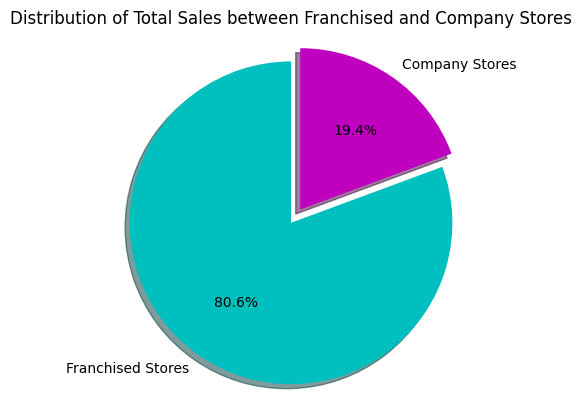

In [399]:
plt.pie(terms, labels=label, colors=cols, startangle=90, shadow=True, explode=(0,0.1), autopct='%1.1f%%')
plt.axis('equal')
plt.title('Distribution of Total Sales between Franchised and Company Stores')
plt.show()

#### so it seems that much of the sales are coming from the franchised stores and only 19.4% comes from the company stores 

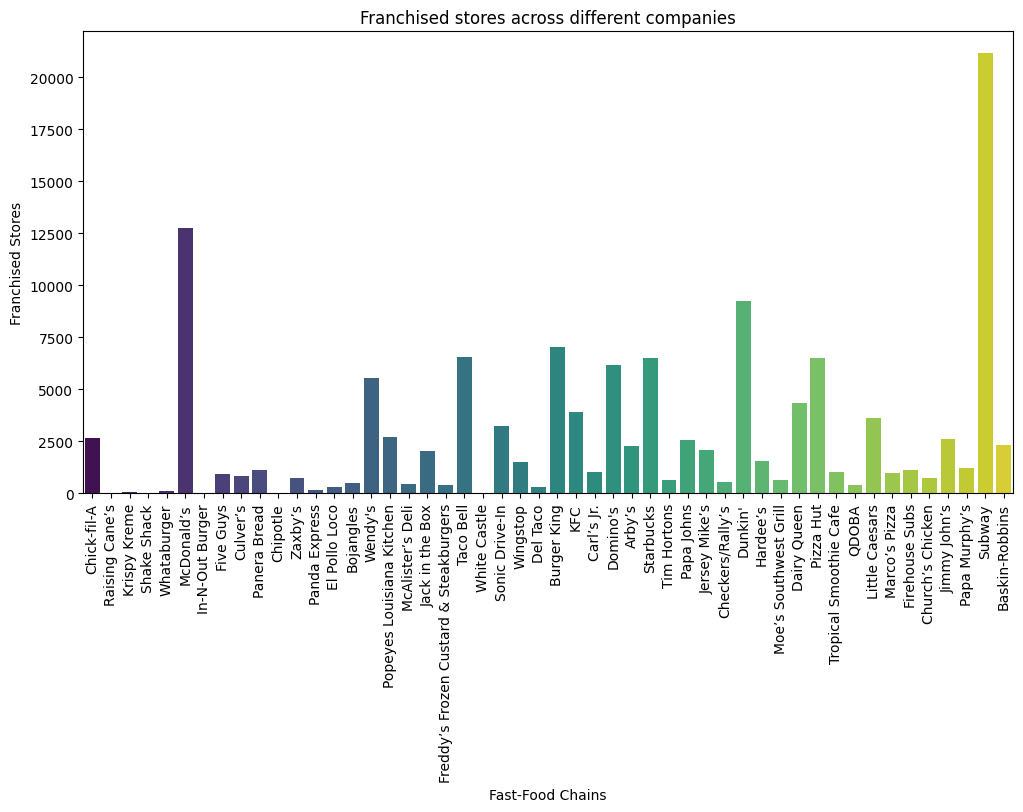

In [400]:
plt.figure(figsize=(12, 6))  # Set the figure size
sns.barplot(y=data2["Franchised Stores"], 
            x=data2["Fast-Food Chains"], 
            palette='viridis')  # You can choose any color palette you like


plt.xticks(rotation=90)
plt.xlabel("Fast-Food Chains")
plt.ylabel("Franchised Stores")
plt.title("Franchised stores across different companies")
plt.show()

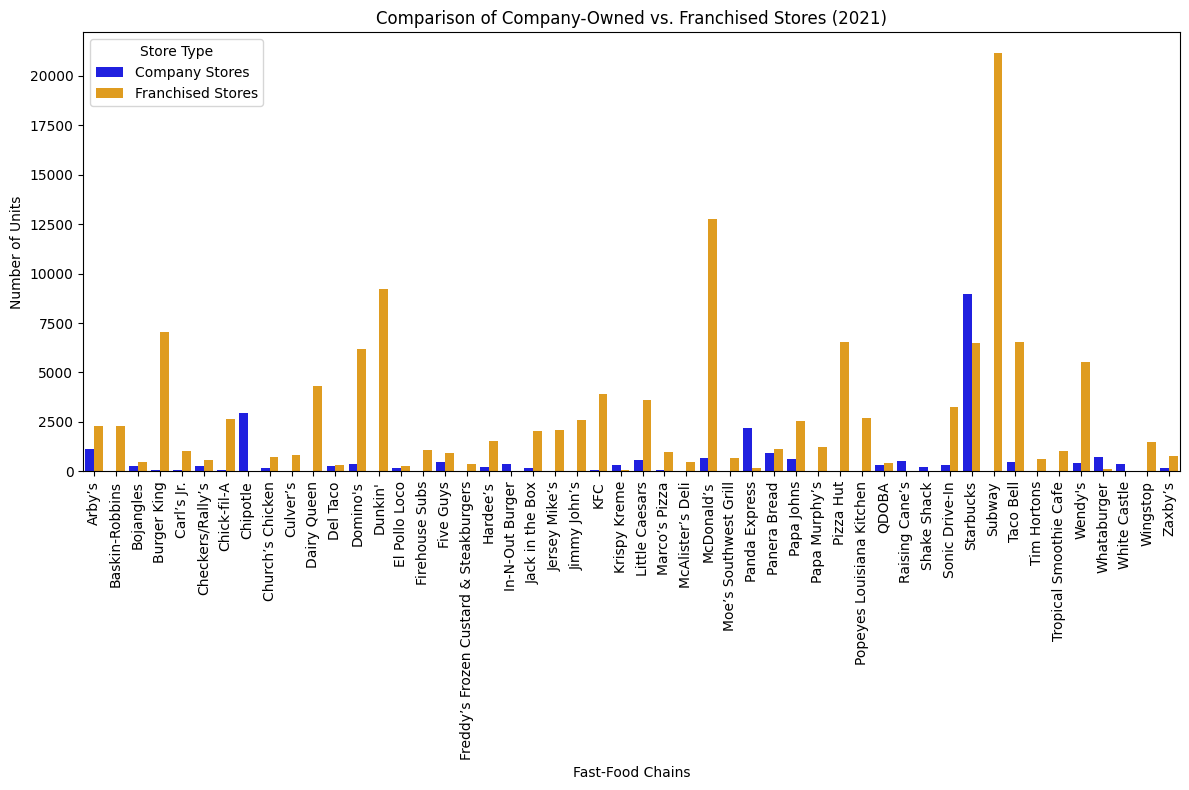

In [401]:
sorted_data=data.sort_values("Total Change in Units from 2020",ascending=False)
melted_data = data.melt(id_vars='Fast-Food Chains', 
                         value_vars=['Company Stores', 'Franchised Stores'],
                         var_name='Store Type', 
                         value_name='Number of Units')
plt.figure(figsize=(12,8))
sns.barplot(x='Fast-Food Chains',y='Number of Units',hue='Store Type',data=melted_data,palette={"Company Stores": 'blue', 'Franchised Stores': 'orange'})
plt.xlabel('Fast-Food Chains')
plt.ylabel('Number of Units')
plt.title('Comparison of Company-Owned vs. Franchised Stores (2021)')
plt.xticks(rotation=90)
plt.legend(title='Store Type')
plt.tight_layout()
plt.show()

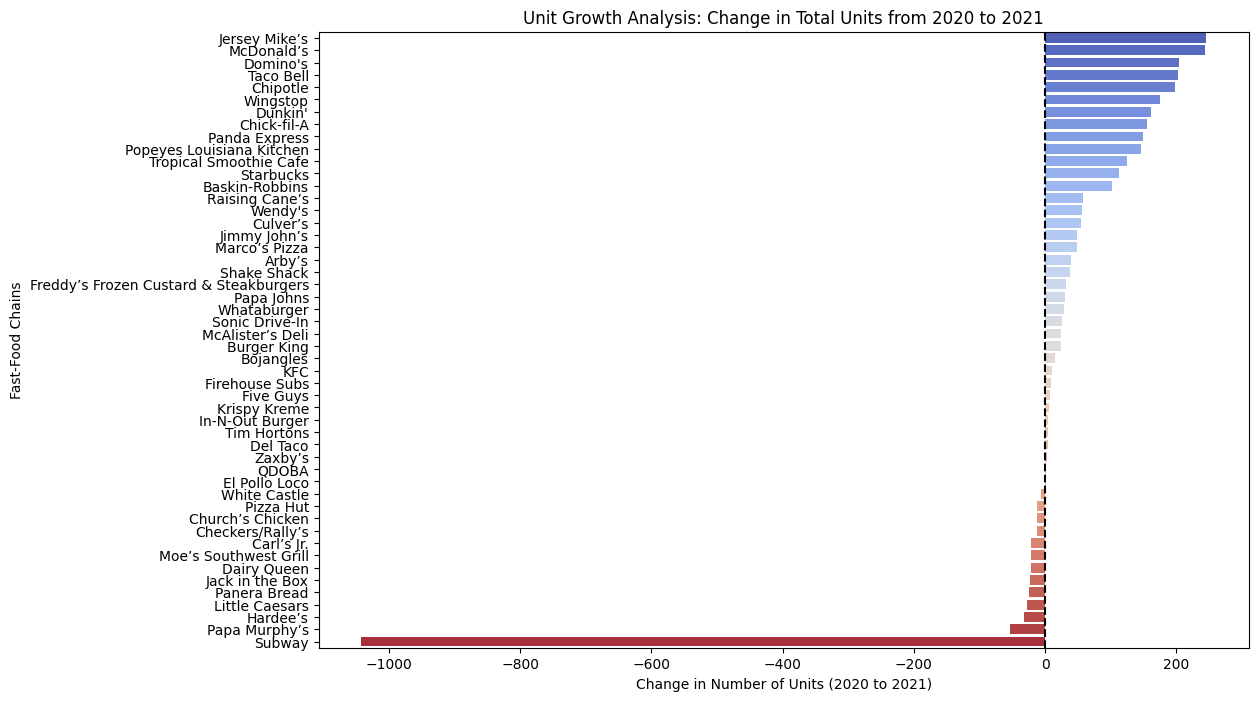

In [402]:

plt.figure(figsize=(12,8))
sns.barplot(x='Total Change in Units from 2020', y='Fast-Food Chains', data=sorted_data, palette='coolwarm')
plt.xlabel('Change in Number of Units (2020 to 2021)')
plt.ylabel('Fast-Food Chains')
plt.title('Unit Growth Analysis: Change in Total Units from 2020 to 2021')
plt.axvline(x=0, color='black', linestyle='--')  # Add a vertical line at zero
plt.show()

The COVID-19 pandemic acted as a critical stress test for the fast-food industry, revealing significant vulnerabilities and opportunities among different chains. Subway, predominantly reliant on franchised stores, faced a stark decline of over 1,000 units, reflecting the struggles of individual franchisees during a period of low foot traffic and shifting consumer behavior. In contrast, chains like McDonald’s and Jersey Mike’s not only maintained but expanded their store counts by over 100 units each, leveraging investments in delivery and takeout infrastructure to adapt to changing market demands.

This disparity underscores the importance of a balanced business model. While franchising offers growth opportunities, chains with a mix of franchised and company-owned stores, like McDonald’s, demonstrated greater resilience and operational flexibility during unprecedented disruptions. These insights highlight the need for fast-food chains to evaluate their operational strategies to ensure long-term sustainability and adaptability in an evolving landscape.

In [403]:
correlation, p_value = pearsonr(data['Average Sales per Unit (Thousands - U.S Dollars)'], data['Total Change in Units from 2020'])
print(f"Pearson Correlation Coefficient: {correlation:.2f}, P-value: {p_value:.4f}")

Pearson Correlation Coefficient: 0.24, P-value: 0.1004


There's a weak positive correlation between average sales per unit

<Axes: >

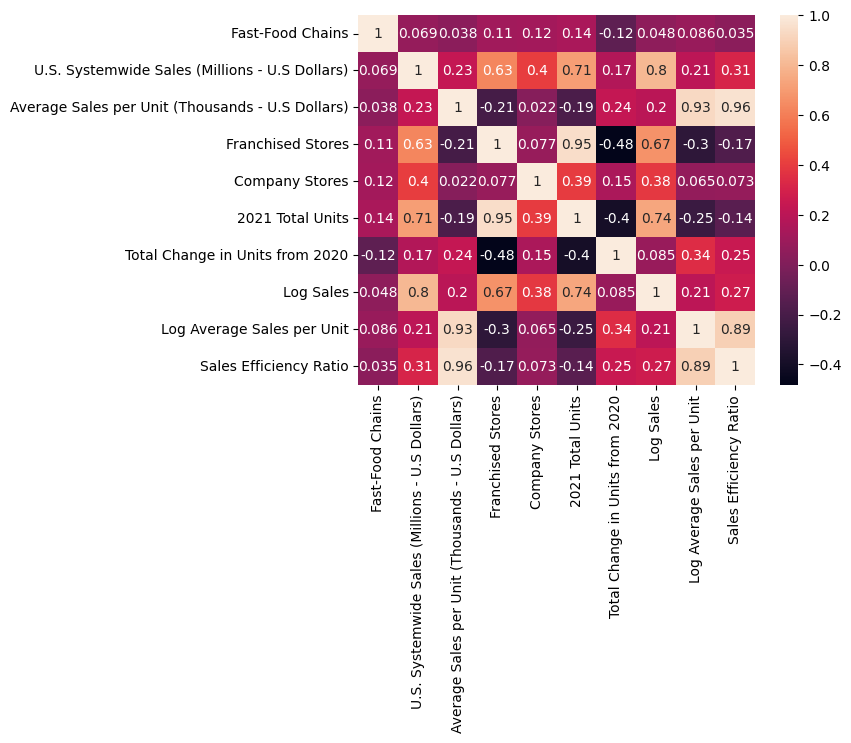

In [404]:
data3=data.copy()

data3["Fast-Food Chains"]=data3["Fast-Food Chains"].astype("category").cat.codes
corr=data3.corr()
sns.heatmap(corr,annot=True)

### MACHINE LEARNING

##### So with Machine learning here its not very essential since the data is too small for machine learning. The small size limits the robustness and reliability of any predictions made.


####  Linear regression to predict sales

In [405]:
# PREDICTING SALES
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [406]:
data.columns

Index(['Fast-Food Chains', 'U.S. Systemwide Sales (Millions - U.S Dollars)',
       'Average Sales per Unit (Thousands - U.S Dollars)', 'Franchised Stores',
       'Company Stores', '2021 Total Units', 'Total Change in Units from 2020',
       'Log Sales', 'Log Average Sales per Unit', 'Sales Efficiency Ratio'],
      dtype='object')

In [407]:
X=data3[['Average Sales per Unit (Thousands - U.S Dollars)','Franchised Stores',
       'Company Stores']]
y=data3[["U.S. Systemwide Sales (Millions - U.S Dollars)"]]

In [408]:
lr=LinearRegression()
scaler=StandardScaler()

In [409]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.1,random_state=42)

In [410]:
lr.fit(X_train,y_train)

LinearRegression()

In [411]:
y_pred=lr.predict(X_test)
from sklearn.metrics import mean_squared_error,r2_score

In [412]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred,squared=False))

0.882613947355848
1319.771145441613


In [413]:
X = data[['Log Average Sales per Unit', 'Franchised Stores', 'Company Stores']]
y = data['Log Sales']


In [414]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=42)

In [415]:
lr.fit(X_train,y_train)

LinearRegression()

In [416]:
y_pred=lr.predict(X_test)

In [417]:
print(r2_score(y_test,y_pred))
print(mean_squared_error(y_test,y_pred,squared=False))

0.6172193277740466
0.5797383685874861


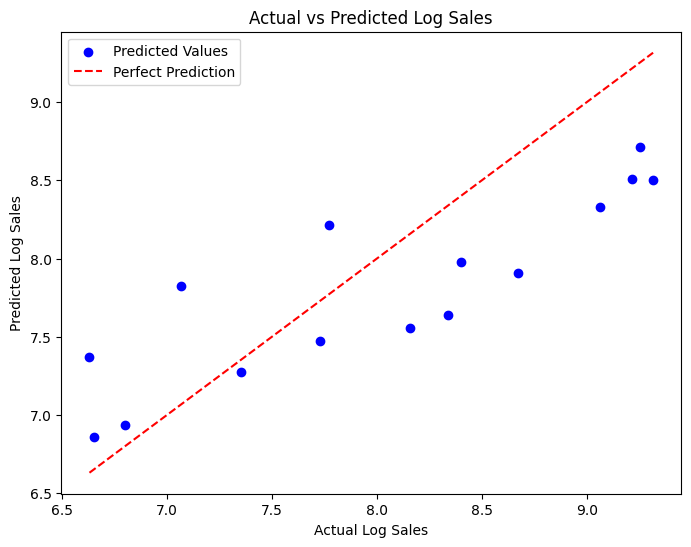

In [418]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue',label='Predicted Values')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction')
plt.title('Actual vs Predicted Log Sales')
plt.xlabel('Actual Log Sales')
plt.ylabel('Predicted Log Sales')
plt.legend()
plt.show()

This scatter of the data shows the non-linearity in the data  and has outliers .Also the data shows variations in Predictions ,there's a noticable spread of predicted from the actual values

In [432]:
bins = [0, 500, 2000, data['U.S. Systemwide Sales (Millions - U.S Dollars)'].max()]
labels=["low","Median","High"]
data['Performance Category'] = pd.cut(data['U.S. Systemwide Sales (Millions - U.S Dollars)'], 
                                      bins=bins, labels=labels)
features = data[['Average Sales per Unit (Thousands - U.S Dollars)', '2021 Total Units']]
target = data['Performance Category']


In [433]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score


In [434]:
X_train,X_test,y_train,y_test=train_test_split(features,target,test_size=0.2,random_state=42)

In [435]:
clf=DecisionTreeClassifier(random_state=42)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

In [436]:
print("Classification Report:")
print(classification_report(y_test,y_pred))

Classification Report:
              precision    recall  f1-score   support

        High       1.00      1.00      1.00         7
      Median       1.00      1.00      1.00         3

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10



In [437]:
print("Confusion Matrix: ")
conf_matrix=confusion_matrix(y_test,y_pred)
print(conf_matrix)

Confusion Matrix: 
[[7 0]
 [0 3]]


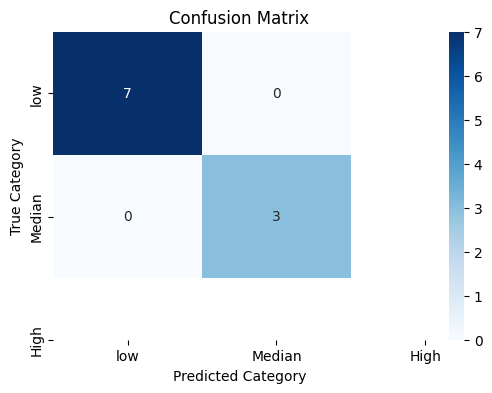

In [438]:
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', 
            xticklabels=labels, yticklabels=labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Category')
plt.ylabel('True Category')
plt.show()

In [439]:
accuracy=accuracy_score(y_test,y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

Accuracy Score: 1.00


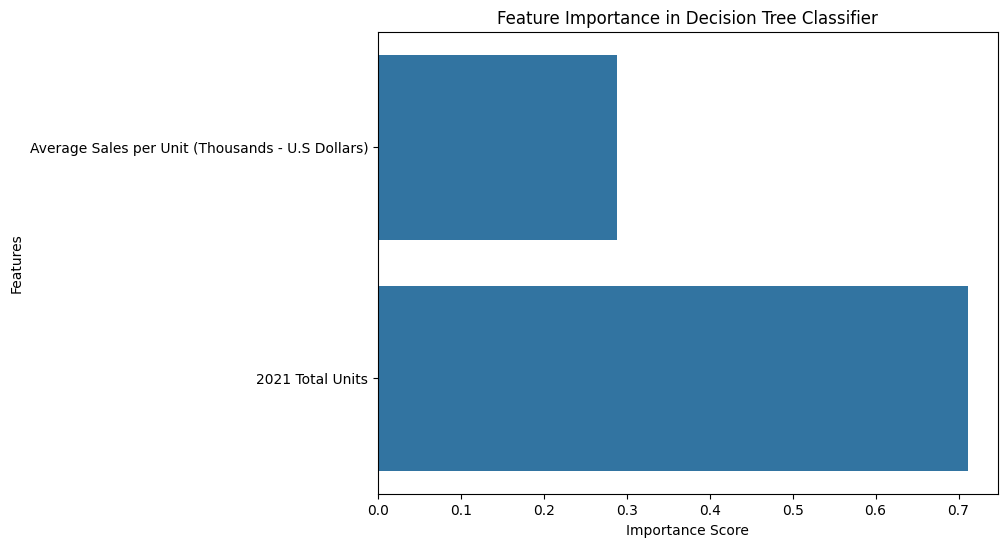

In [440]:
feature_importances = pd.Series(clf.feature_importances_, index=features.columns)

plt.figure(figsize=(8, 6))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importance in Decision Tree Classifier')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

Average Sales per Unit and Total Units are effective predictors of a fast food chain's Perfomance category (High,Medium or Low )

Predictive Power of Features:

Average Sales per Unit and Total Units play crucial roles in determining a chain's performance level.
High Average Sales per Unit is a strong indicator of operational efficiency, which can elevate a chain to the High performer category, even if the number of units is relatively low.
Impact of Scale and Efficiency:

Chains with a larger number of units tend to have higher total sales, making Total Units a significant factor in classifying High performers.
Chains like Chick-fil-A are examples of high efficiency with fewer stores, while chains like McDonald’s use their extensive scale to achieve high sales.
Strategic Recommendations:

Chains looking to improve performance can focus on either increasing their number of units to gain market presence or enhancing the efficiency of existing units to boost per-store sales.
This model helps categorize fast-food chains and provides a framework for evaluating different strategies to achieve higher performance levels in the competitive landscape.